>Приветствую! Меня зовут Александр и я буду проверять твой проект :)
>
>Ниже в ноутбуке будут мои комментарии, закодированные разными цветами.
>
>**_<span style="color:green">Зеленым будут выделены места, которые хочется особенно отметить, как хорошие. </span>_**
>
> **_<span style="color:red">Недочеты, откомментированные красным обязательны к доработке – без их исправления домашка не будет зачтена. </span>_**
>  
> **_<span style="color:orange">Недочеты и подсказки, откомментированные оранжевым, учесть желательно, но их доработка не является обязательным условнием для зачета.</span>_**
>
> Если какие-то подзадачи не откомментированны – значит с ними все окей, нет возражений.
>
> Если ошибка влечет за собой дальнейшие неточности рассчетов или выводов – пожалуйста, поправь их тоже, чтобы аналитический отчет был целостным.
>
>Пожалуйста, не удаляй и не переноси мои комментарии, это позволит лучше ориентироваться при возможных повторных проверках.

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
df = pd.read_csv('/datasets/real_estate_data.csv', delimiter='\t')
print(df.head())
df.info()
df.describe()

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1       

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

Большинство колонок заполнены в полном объемы. Необходимо заполнить нехватаюзие важные данные по:
    - Высота потолков
    
Изменить тип ячейки даты для дальнейшей работы с ними.
    


>**_<span style="color:green">Все кратко и по делу.</span>_**
>


### Шаг 2. Предобработка данных

In [2]:
# Перевод строковых значений в дату и время
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# Заполняем пропущенные данные по количеству балконов
df['balcony'] = df['balcony'].fillna(0)

# Заполняем пропущенные данные по количеству балконов
df['is_apartment'] = df['is_apartment'].fillna(False)

#Удаляем дубликаты
#print(df.duplicated().sum())
df.drop_duplicates().reset_index(drop=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,False,...,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,False,...,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


> **<span style="color:orange">Такое заполнение пропуска может скорее помешать.</span>**
>
> **<span style="color:orange">*Пример*: в дальнейшем анализе мы можем захотеть посчитать зависимость цены от высоты потолка. При таком заполнении пропуска, мы добавим к реальным данным (где есть и заполенная высота потолка, и цена) наши синтетические (медианы значений высоты потолка и реальные цены этих квартир).</span>** 
>
> **<span style="color:orange">*Что произойдет*: мы можем сделать неправильные выводы из анализа зависимости цены от потолка.</span>** 
>
> **<span style="color:orange">*Как правильно поступить в случае этого столбца*: забить на пропуск : ) Подавляющее большинство методов анализа, которые вы сейчас проходите, будут корректно обрабатывать датафрейм, в котоором в некоторых строках есть NaN в одном подмножестве столбцов, в некоторых – в другом. Это касается в том числе методов, используемых в этой домашке: точки на графиках для NaN-значений просто не построятся, корелляция для этих строк не посчитается, и часто это лучше, чем добавление множества синтетических точек.</span>** 
>
> **<span style="color:orange">*Когда так не надо делать?* Не стоит забивать на пропуск, если мы можем с большой уверенностью предположить возможную причину пропуска и полезное значение на замену. Такие примеры есть в этой домашке (например, балкон). Также в некоторые методы, в том числе некоторые методы машинного обучения, категорически не умеют работать с пропусками, но таких методов в вашем арсенале пока нет, можно не беспокоиться.</span>** 
>
> **_<span style="color:orange">В общем случае, если этого не требуют используемые методы, или если это явно не указано в задаче, то можно не ставить целью получить данные польностью без NaN.</span>_**

>**_<span style="color:red">~~Не увидел у тебя замены остальных пропусков. Если ты решил их оставить без изменений, добавь, пожалуйста, аргументацию почему ты решил оставить пропуски без обработки.~~</span>_**

Посмотрел на задачу под "другим углом", внес следующие изменения:

- убрал синтетические данные по высоте потолков (не совсем согласен, т.к. при имеющихся данных по гео точкам и этажности здания можно поставить гипотезу, что эти здания принадлежат одной серии и имеют одинаковые характеристики. Но допускаю, да, что этажность также может влиять на высоту потолков, особенно в => бизнес классе, и вводные мною данные могут содержать совпадения, что скорее всего достаточно ничтожны. Но допускаю и то, что пользователь может некорректно вбивать данные по этажности, поэтому рассматривал бы подсоединение этих данных из других БД по серийности дома с возможностью редактировать, т.е. также бы автоматизировал бы)

- добавил нулевые значения в данные про балконы (нет балкона = 0, т.к. скорее всего так и есть, и вряд ли человек забыл  добавить эти данные)

- заполняем данные по апартаментам (логика та же: пустая клетка - не является апартаментами)

### Шаг 3. Посчитайте и добавьте в таблицу

In [3]:
# Добавляем данные за стоимость 1м
df['1m'] = (df['last_price'] / df['total_area']).round(0).astype('int')

# Добавляем данные по времени публикации
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

In [4]:
# Добавляем данные по этажности
data = df.loc[:,'floors_total']
data_city = df.loc[:,'cityCenters_nearest']
data_airport = df.loc[:,'airports_nearest']
empty_list_floor = [] # Нет данных по ближайшему расстоянию до точек
error_list_floor = [] # Когда нет совпадений по полученным сгруппированным точкам ("одиночка")
counter = 0

for row in data:
    if data.isna().values[counter] == True:
        if data_city.isna().values[counter] == True | data_airport.isna().values[counter] == True:
            empty_list_floor.append(counter)
            counter += 1               
        else:
            try:
                floor = df[(df['airports_nearest'] == df.loc[counter, 'airports_nearest']) & 
                        (df['cityCenters_nearest'] == df.loc[counter, 'cityCenters_nearest'])].pivot_table(index='cityCenters_nearest', values='floors_total', aggfunc='mean')
                floor_index = df[(df['airports_nearest'] == df.loc[counter, 'airports_nearest']) & 
                        (df['cityCenters_nearest'] == df.loc[counter, 'cityCenters_nearest'])]['cityCenters_nearest'].mean()
                df.loc[counter, 'floors_total'] = floor.loc[floor_index,'floors_total']
                counter += 1
            except:
                error_list_floor.append(counter)
                counter += 1
    else:
        counter += 1
        continue

#print(empty_list_floor)
#print(error_list_floor)
#print(df.loc[:, 'floors_total'].isna().sum())

def floor_text(data):
    if data['floor'] == data['floors_total']:
        return 'последний'
    if data['floor'] == 1:
        return 'первый'
    else:
        return 'другой'

df['floor_text'] = df.apply(floor_text, axis=1)

In [5]:
# Добавляем данные по соотношению жилой и общей площади, а также отношению площади кухни к общей
def living_ratio(data):
    for_ratio = data['living_area'] / data['total_area']
    return for_ratio

df['living_ratio'] = df.apply(living_ratio, axis=1).round(2)

def kitchen_ratio(data):
    for_ratio = data['kitchen_area'] / data['total_area']
    return for_ratio   

df['kitchen_ratio'] = df.apply(kitchen_ratio, axis=1).round(2)

>**<span style="color:green">Здесь ноль замечаний, молодец.</span>**
>
>**<span style="color:orange">На будущее рекомендую разделять каждую операцию и каждую подзадачу проекта на отдельные ячейки с кодом и выводы в ячейках markdown. Так твой проект станет более структурированным и тебе самому будет проще в нем ориентироваться, особенно это актуально если что-то перестанет работать. Также в среде аналитиков часто возникает необходимость поделиться своим ноутбуком с коллегами или начальством, и если все будет структурированно, то коллеги не потратят много времени на "ориентацию на местности" :)</span>**



### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

Среднее время продажи квартиры: 181
Медианное время продажи квартиры: 95
                     last_price  total_area     rooms  cityCenters_nearest
last_price             1.000000    0.717596  0.475633            -0.347987
total_area             0.717596    1.000000  0.803030            -0.133096
rooms                  0.475633    0.803030  1.000000            -0.084012
cityCenters_nearest   -0.347987   -0.133096 -0.084012             1.000000
                      1m                           last_price             \
                    mean   median           sum          mean     median   
floor_text                                                                 
другой      98412.299536  97059.0  1.505413e+09  5.219350e+06  4700000.0   
первый      85187.703279  83805.5  2.078580e+08  4.574603e+06  4100000.0   
последний   90246.399698  88983.0  2.388822e+08  4.980051e+06  4350000.0   

                         total_area                    
                     sum       mean med

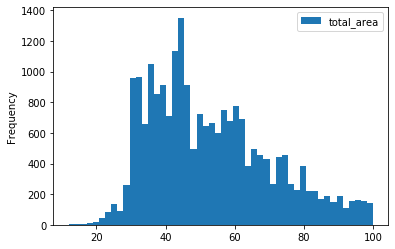

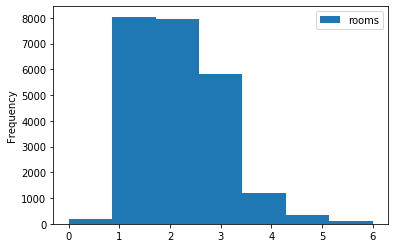

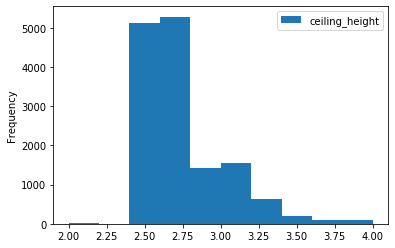

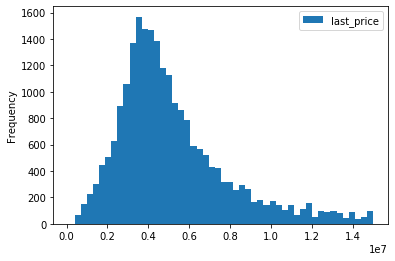

<Figure size 432x288 with 0 Axes>

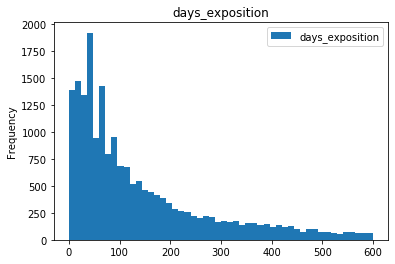

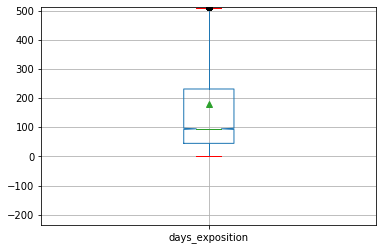

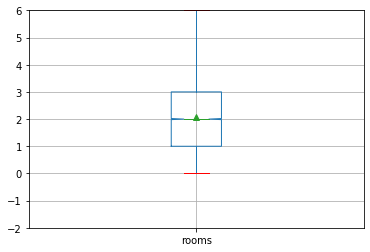

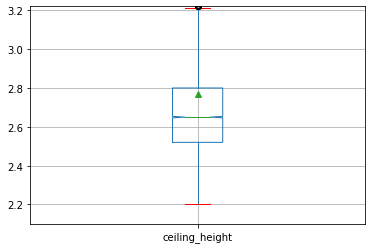

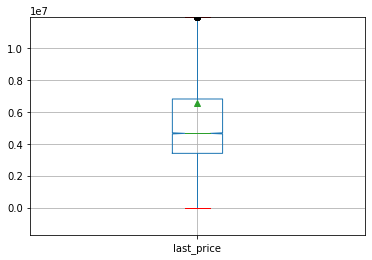

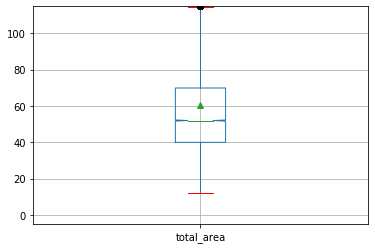

<Figure size 432x288 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# площадь, цена, число комнат, высота потолков.
df.plot(kind='hist', bins=50, range=(12,100), y='total_area')
df.plot(kind='hist', y='rooms', range=(0,6), bins=7)
df.plot(kind='hist', y='ceiling_height', range=(2,4), bins=10)
df.plot(kind='hist', y='last_price',range=(100000, 15000000), bins=50)
plt.figure()

# Cколько обычно занимает продажа?
print("Среднее время продажи квартиры: {:.0f}".format(df['days_exposition'].mean()))
print("Медианное время продажи квартиры: {:.0f}".format(df['days_exposition'].median()))
df.plot(kind='hist', y='days_exposition', bins=50, range=(0,600), title='days_exposition')
plt.figure()

# Убрать редкие и выбивающиеся значения.
for_boxplot = ['days_exposition', 'rooms','ceiling_height','last_price','total_area']
for column in for_boxplot:
    df.boxplot(column=column, showbox=True, capprops=({'color':'red'}), notch=True, showmeans=True)
    y_end = ((np.percentile(df[column].dropna(), 75) - 
               np.percentile(df[column].dropna(), 25)) * 1.5 + np.percentile(df[column].dropna(), 75))
    y_start = (np.percentile(df[column].dropna(), 25) - 
             (np.percentile(df[column].dropna(), 75)- np.percentile(df[column].dropna(), 25)) * 1.5) 
    plt.ylim(y_start, y_end)
    plt.figure()

df_for_analysis = df.query((' 0 <= rooms <= 4') and ('2.5 <= ceiling_height <= 3.2') and ('30 <= total_area <= 120') 
                           and ('2000000 <= last_price <= 12000000'))

#Какие факторы больше всего влияют на стоимость квартиры? 
price_value = df_for_analysis.loc[:,('last_price', 'total_area', 'rooms', 'cityCenters_nearest')]
#pd.plotting.scatter_matrix(price_value, figsize=(10,10))
print(price_value.corr())

print(df_for_analysis.pivot_table(index='floor_text', values=('1m', 'last_price', 'total_area'), aggfunc=('median', 'mean', 'sum')))

#print(df_for_analysis['last_price'].corr(df_for_analysis['weekday']))
#print(df_for_analysis['last_price'].corr(df_for_analysis['month']))
#print(df_for_analysis['last_price'].corr(df_for_analysis['year']))


In [7]:
### Код ревьювера ###

len(df_for_analysis) / len(data)

0.8601206801974767

>**<span style="color:green">По графикам и вычислениям все хорошо. Хорошо что для поиска границ для выбросов понятие межквартильного размаха и 25-й и 75-й персентили.</span>**
>
> **_<span style="color:orange">Я бы не стал искать аномалии в высоте потолков и количестве комнат. Все-таки это не ключевые параметры, определяющие стоимость квартир. И совершенно точно не стал бы исключать объявления с аномальными сроками размещения.  Для нашей задачи исследовательского анализа и поиска зависимостей не стоит слишком сильно усердствовать с удалением выбросов.</span>_**


### Задача 1:

Площадь квартиры: наибольшее количество представленных квартир фигурирует в размере 45м2, 30м2, 60м2.

Количество комант: на рынке одинаково представлены 1- и 2-ух комантные квартиры.  Снебольшим отставанием (~30%) представлены 3ех комнатные квартиры. Очень мало представлено квартир с открытой планировкой и студий ("0" на графике).

Высота потолков:большинство представленных квартир располагает потолками в 2.5 - 2.75 м. 

Цена: пик цен приходится на 3-4М руб. 

Аномалия видна именно по дням размещения, т.к. закрываются объявления на 30 / 45 / 60 / 90 дни. Не знаю, по какому принципу работает я.недвижимость, но это либо какое-то мошенническое действие, либо система автоматически закрывает объявления исходя из какого-то принципа. 

### Задача 2:
Медианное время продажи квартиры: 95 дней.
Серднее время продажи: 181 день

Оптимальное время продажи квартиры находится в районе 45-232 дней. Все что находится за рамками указанных границ является  долгим / быстрым . Необычайно долгими являются продажи >512 дней. 

### Задача 3:
Убираем редкие / выбивающиеся значения:
- Дни публикации: оставляем значения в рамка 10 <= x <= 512, как находящиеся в рамках диаграммы размаха. Откидываем значения <10 по причине сомнительности данных. Из необычного стоит отметить большое количество объявления, снятых на 30/45/60/90 дни размещения.
- Количество комнат: оставляем срез 0 <= x <= 4, т.к. все остальные являются выбивающимися из общегоя ряда значениями.
- Высота потолков: оставляем срез 2.5 <= x <= 3.2, т.к. все остальные являются выбивающимися из общегоя ряда значениями.
- Метраж: оставляем срез 30 <= x <= 120
- Стоимость квартиры: срез 2М <= x <= 12М

### Задача 4:
Зависит ли цена от квадратного метра, числа комнат, удалённости от центра:
На первый взгляд наибольшая  зависимость видна стоимости от метража - сильная корреляция.
Количество комант - средняя корреляция.
Расстояние до центра - обратная средняя корреляция.

Квадратный метр: нет четкой зависимости от этажности. Наблюдается повышенная стоимость между первым и последним этажом, но промежуточные этажи в в среднем стоят дороже.

День / Неделя / Месяц: никак не коррелирует со стоимостью, только с количество объявлений.

Возможно при структуризации объявлений от центра СПб и анализа по отдельности будет видна более яркая картина зависимости.

##### Обновление_1: 
матрица корреляций дана в цифрах

In [8]:
# Корректируем написание населенных пунктов
df['locality_name'] = df['locality_name'].str.split()

bad_word = ['поселок']
counter = 0

for row in df.loc[:,'locality_name']:
    try:
        word_counter = 0
        for word in row:
            if word in bad_word:
                row.remove(word)
                row.insert(word_counter, 'посёлок')
                word_counter += 1
            else:
                word_counter += 1
                continue
    except:
            continue
            
    counter += 1

#print(df.loc[37,'locality_name'])

разбиваем по словам город объявления и статус населенного пункта. Далее заменяем некорреткное написание "поселок" на "посёлок", дабы исключить ошибку в дальнейших расчетах

In [9]:
counter = 0
for row in df.loc[:,'locality_name']:
    try:
        df.loc[counter, 'locality_name'] = ' '.join(df.loc[counter,'locality_name'])
        counter += 1
    except:
        counter += 1
        continue

Превращаем данные из списка в строку

>
> **_<span style="color:orange">Кажется, тут мы слишком усложнили процедуру поиска разного написания городов и населенных пунктов. Можно было привести `посёлок` и `поселок` к одному типу и воспользоваться простой функцией value_counts().</span>_**
>



In [10]:
df_for_analysis = df.query(('10 <= days_exposition <= 512') and (' 0 <= rooms <= 4') 
                           and ('2.5 <= ceiling_height <= 3.2') and ('30 <= total_area <= 120') 
                           and ('2000000 <= last_price <= 12000000'))

top_10_cities = df_for_analysis['locality_name'].value_counts().head(10).index.tolist()
df_top_10_cities = df.query('locality_name in @top_10_cities')

top_10_cities_pt = df_top_10_cities.pivot_table(index='locality_name', values=('1m', 'last_price'), aggfunc=('count', 'mean','sum'))
top_10_cities_pt.columns = ['Количество_объявлений', 'Стоимость_1м', 'Херня', 'Херня_2', 'Цена', 'Херня_3']
top_10_cities_pt = top_10_cities_pt.drop(columns=['Херня', 'Херня_2', 'Херня_3'])
print(top_10_cities_pt.sort_values(by='Количество_объявлений', ascending=False))

                   Количество_объявлений   Стоимость_1м          Цена
locality_name                                                        
Санкт-Петербург                  15721.0  114849.005788  8.062507e+06
посёлок Мурино                     556.0   85681.758993  3.652361e+06
посёлок Шушары                     440.0   78677.379545  4.108082e+06
Всеволожск                         398.0   68654.474874  3.789068e+06
Пушкин                             369.0  103125.818428  6.469036e+06
Колпино                            338.0   75424.571006  3.964021e+06
посёлок Парголово                  327.0   90175.886850  4.488075e+06
Гатчина                            307.0   68746.110749  3.488337e+06
деревня Кудрово                    299.0   92473.588629  4.234158e+06
Выборг                             237.0   58141.919831  3.250983e+06


Полученный список - топ 10 городов с наибольшим количеством объявлений.
Наибольшая стоимость за 1м. в Санкт-Петербурге, далее следуте Пушкин. Отсает от представленного списка Выборг. По средней стоимости за квартиру разница между Санкт-Петербургом и остальными населенными пунктами (кроме Пушкино) значительно выше.

>**<span style="color:red">~~Код не работает, поправь, пожалуйста.~~</span>**

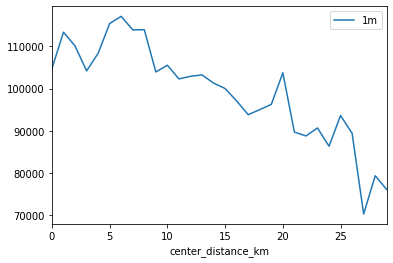

In [11]:
# Выделяем центр СПб
spb_df = df_for_analysis.query('locality_name == "Санкт-Петербург"')
def center_distance_km(row):
    try:
        km = round(row['cityCenters_nearest'] / 1000, 0)
        return km
    except:
        return 0

df['center_distance_km'] = df.apply(center_distance_km, axis=1)

df_for_analysis = df.query(('10 <= days_exposition <= 512') and (' 0 <= rooms <= 4') 
                           and ('2.5 <= ceiling_height <= 3.2') and ('30 <= total_area <= 120') 
                           and ('2000000 <= last_price <= 12000000'))

spb_df = df_for_analysis.query('locality_name == "Санкт-Петербург"')

spb_pt = spb_df.pivot_table(index='center_distance_km', values='1m',  aggfunc=('median')).reset_index()
spb_pt.plot(x='center_distance_km', y='1m')

spb_center / total_area =
| 5: 35.0 | 25: 55.0 | 50: 76.0 | 75: 107.0 |-1,5 IQR: -23.0 | +1,5 IQR 185.0
spb_other / total_area =
| 5: 31.0 | 25: 39.2 | 50: 49.7 | 75: 64.5 |-1,5 IQR: 1.3 | +1,5 IQR 102.4
spb_center / last_price =
| 5: 4099500.0 | 25: 6450000.0 | 50: 8950000.0 | 75: 13900000.0 |-1,5 IQR: -4725000.0 | +1,5 IQR 25075000.0
spb_other / last_price =
| 5: 2900000.0 | 25: 3800000.0 | 50: 4750000.0 | 75: 6300000.0 |-1,5 IQR: 50000.0 | +1,5 IQR 10050000.0
spb_center / rooms =
| 5: 1.0 | 25: 2.0 | 50: 3.0 | 75: 3.0 |-1,5 IQR: 0.5 | +1,5 IQR 4.5
spb_other / rooms =
| 5: 1.0 | 25: 1.0 | 50: 2.0 | 75: 3.0 |-1,5 IQR: -2.0 | +1,5 IQR 6.0
spb_center / ceiling_height =
| 5: 2.5 | 25: 2.8 | 50: 3.0 | 75: 3.25 |-1,5 IQR: 2.1 | +1,5 IQR 3.9
spb_other / ceiling_height =
| 5: 2.5 | 25: 2.5 | 50: 2.6 | 75: 2.75 |-1,5 IQR: 2.1 | +1,5 IQR 3.1


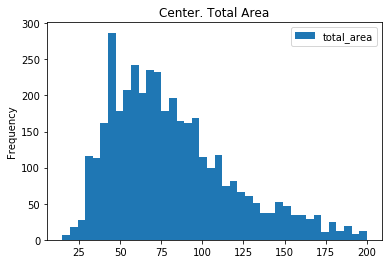

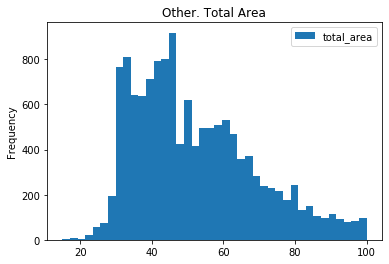

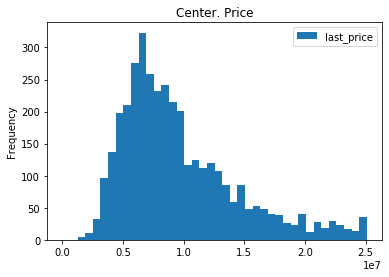

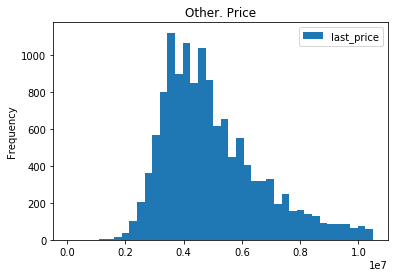

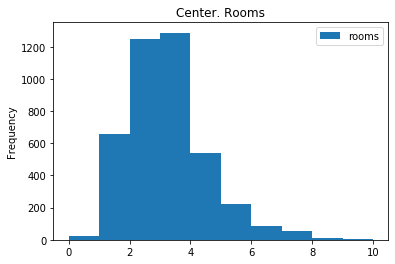

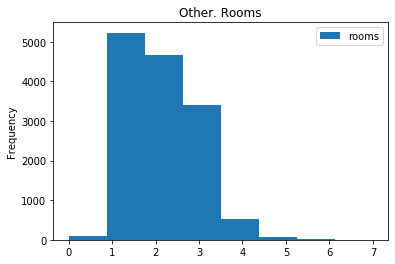

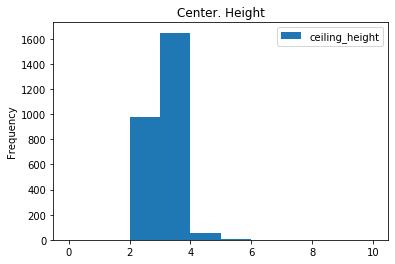

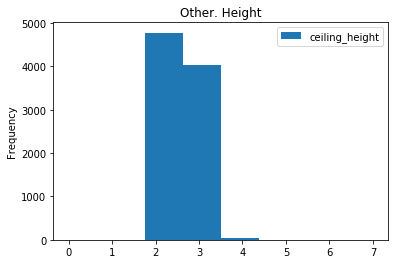

In [12]:
# Изучение предложенных квартир в СПб
spb_center = df.query(('locality_name == "санкт-петербург"') and ('center_distance_km < 9'))
spb_other = df.query(('locality_name == "санкт-петербург"') and ('center_distance_km >= 9'))

def percentiles(data, column):
    IQR_left = (np.percentile(data[column].dropna(), 25) - 
             (np.percentile(data[column].dropna(), 75)- np.percentile(data[column].dropna(), 25)) * 1.5).round(1)
    IQR_right = ((np.percentile(data[column].dropna(), 75) - 
               np.percentile(data[column].dropna(), 25)) * 1.5 + np.percentile(data[column].dropna(), 75)).round(1)
    return print('| 5:', (np.percentile(data[column].dropna(), 5)), '| 25:', (np.percentile(data[column].dropna(), 25)), '| 50:', (np.percentile(data[column].dropna(), 50)),
                '| 75:', (np.percentile(data[column].dropna(), 75)), '|-1,5 IQR:', IQR_left, '| +1,5 IQR', IQR_right)

# Сравнение площади квартиры
print('spb_center / total_area =')
percentiles(spb_center, 'total_area')
print('spb_other / total_area =')
percentiles(spb_other, 'total_area')

spb_center.plot(kind='hist', y='total_area', bins=40, range=(15,200), title='Center. Total Area')
spb_other.plot(kind='hist', y='total_area', bins=40, range=(15,100), title='Other. Total Area')

# Сравнение стоимости квартиры
print('spb_center / last_price =')
percentiles(spb_center, 'last_price')
print('spb_other / last_price =')
percentiles(spb_other, 'last_price')

spb_center.plot(kind='hist', y='last_price', bins=40, range=(0, 25100000), title='Center. Price')
spb_other.plot(kind='hist', y='last_price', bins=40, range=(50000, 10500000), title='Other. Price')

# Сравнение числа комнат
print('spb_center / rooms =')
percentiles(spb_center, 'rooms')
print('spb_other / rooms =')
percentiles(spb_other, 'rooms')

spb_center.plot(kind='hist', y='rooms', bins=10, range=(0, 10), title='Center. Rooms')
spb_other.plot(kind='hist', y='rooms', bins=8, range=(0, 7), title='Other. Rooms')

# Сравнение высоты потолков
print('spb_center / ceiling_height =')
percentiles(spb_center, 'ceiling_height')
print('spb_other / ceiling_height =')
percentiles(spb_other, 'ceiling_height')

spb_center.plot(kind='hist', y='ceiling_height', bins=10, range=(0, 10), title='Center. Height')
spb_other.plot(kind='hist', y='ceiling_height', bins=8, range=(0, 7), title='Other. Height')

In [13]:
# убираем выбросы / находим корреляции
spb_center_analysis = spb_center.query((' 0 <= rooms <= 5') and ('2.5 <= ceiling_height <= 3.9') and ('35 <= total_area <= 185') 
                           and ('4099500 <= last_price <= 25075000'))
spb_other_analysis = spb_other.query((' 0 <= rooms <= 6') and ('2.5 <= ceiling_height <= 3.1') and ('31 <= total_area <= 102') 
                           and ('2900000 <= last_price <= 10500000'))

price_value_spb_center = spb_center_analysis.loc[:,('last_price', 'total_area', 'rooms', 'cityCenters_nearest')]
price_value_spb_other = spb_other_analysis.loc[:,('last_price', 'total_area', 'rooms', 'cityCenters_nearest')]
print(price_value_spb_center.corr())
print(price_value_spb_other.corr())

print(spb_center_analysis.pivot_table(index='floor_text', values=('1m', 'last_price'), aggfunc=('median', 'mean')))
print(spb_other_analysis.pivot_table(index='floor_text', values=('1m', 'last_price'), aggfunc=('median', 'mean')))


#print(spb_center_analysis['last_price'].corr(spb_center_analysis['weekday']))
#print(spb_center_analysis['last_price'].corr(spb_center_analysis['month']))
#print(spb_center_analysis['last_price'].corr(spb_center_analysis['year']))

#print(spb_other_analysis['last_price'].corr(spb_other_analysis['weekday']))
#print(spb_other_analysis['last_price'].corr(spb_other_analysis['month']))
#print(spb_other_analysis['last_price'].corr(spb_other_analysis['year']))


                     last_price  total_area     rooms  cityCenters_nearest
last_price             1.000000    0.723116  0.464869            -0.112767
total_area             0.723116    1.000000  0.802339            -0.177669
rooms                  0.464869    0.802339  1.000000            -0.205184
cityCenters_nearest   -0.112767   -0.177669 -0.205184             1.000000
                     last_price  total_area     rooms  cityCenters_nearest
last_price             1.000000    0.756437  0.482540            -0.131332
total_area             0.756437    1.000000  0.789460             0.102612
rooms                  0.482540    0.789460  1.000000             0.079085
cityCenters_nearest   -0.131332    0.102612  0.079085             1.000000
                       1m              last_price           
                     mean    median          mean     median
floor_text                                                  
другой      129271.305243  124000.0  1.026971e+07  8950000.0
первый

In [25]:
### Код ревьювера ###

matrix_corr = df_for_analysis.corr()
matrix_corr = matrix_corr[['last_price']]
matrix_corr.style.background_gradient(cmap='Greens')

,last_price
total_images,0.14525
last_price,1
total_area,0.717596
rooms,0.475633
ceiling_height,0.10024
floors_total,0.101986
living_area,0.609101
floor,0.0719211
is_apartment,0.0184943
studio,-0.0710464


### Задача 4:
Зависит ли цена от квадратного метра, числа комнат, удалённости от центра:
На первый взгляд наибольшая  зависимость видна стоимости от метража - сильная корреляция.
Количество комант - средняя корреляция.
Расстояние до центра - обратная средняя корреляция.

Квадратный метр: нет четкой зависимости от этажности. Наблюдается повышенная стоимость между первым и последним этажом, но промежуточные этажи в в среднем стоят дороже.

День / Неделя / Месяц: никак не коррелирует со стоимостью, только с количество объявлений.

Возможно при структуризации объявлений от центра СПб и анализа по отдельности будет видна более яркая картина зависимости. 

### Задача 5:
Выявлены и указаны топ 10 городов с наибольшим количеством объявлений о продаже:
Самая низкая средняя стоимость 1м2 в Выборге, самая высокая - Санкт-Петербург. Наибольшая разница между минимальной и максимальной стоимостью зафиксированы также в Санкт-Петербурге. 

### Задание 6:
Определим центральную зону как 8км от 0км.
В сравнении с центром и остальной частью СПб можно отметить, что почти ~25% квартир в центре лучше 75% квартир в оставшихся районах (исходя из представленных метрик). Исключением является количество комнат, что связано скорее всего с простором имеющихся комнат.

Завсимости между центром и остальыми районами почти одинакова. Сильная зависимость имеется только по параметру общего метража, средняя зависимость от количества комнат. Этажность не сильно коррелирует со стоимостью за квадратный метр, но стоимость квартиры растет для квартир, выше первого этажа. 





>**_<span style="color:red">~~Почини код выше и раздели, пожалуйста, свою работу на структурные блоки в соответствии с порядком задач в задании. Каждый пункт - это решение отдельной задачи проекта. Сначала заголовок что мы делаем, затем ячейки с кодом и в конце каждой задачи обязательно добавляй вывод, где кратко опиши какие ответы мы получили, какие методы ты используешь  и по возможности добавь гипотезы о природе наблюдаемых тобой явлений.~~</span>_**
>
>**_<span style="color:red">~~В 4-ом пункте ты пишешь о выявленных зависимостях. Чтобы эти выводы чем-то подкрепить, добавь, пожалуйста матрицу корреляций. Это позволит более явно выделить параметры оказывающие максимальное влияние на цену недвижимости.~~</span>_**
>
>**_<span style="color:green">По остальным выводам и наблюдениям — соглашусь, все хорошо.</span>_**

### Шаг 5. Общий вывод

На основании полученных и заполненных пропущенных данных были убраны выбивающиеся значения и получен анализ:
- Наиболее распространненными являются квартиры 30/45/60м2, 1 или 2ух комнатные, с потолками 2'5-2'75 м и ценой 3-4Млн. руб.
- Медианное время продажи ~95 дней / Среднее ~181 дней, что говорит о выбросах в больших цифрах.
- Со стоимостью коррелирует напрямую площадь квартиры и частично количество комнат.
- Если сравнивать на примере города СПб, то корреляции схожи. Из изученных параметров разница заметна в росте стоимости квартир последний / другие и квартир, располагающихся на первом этаже.

P.S. Прошу прощения за общую неопрятность и скудность. Очень торопился, видимо в v2, после комментариев, поправлю по возможности / или необходимости.

>**В целом мне понравился твой проект, видно, что у тебя хорошо получилось усвоить материалы спринта и умело применить новые навыки на практике. Но нужно еще немного доработать проект и исправить ряд недочётов. Буду ждать доделанный проект на повторную проверку. Успехов!**
>
>**На будущее хотел бы порекомендовать тебе большее внимание уделять структуре своих работ — это очень важное качество в работе аналитика. Иногда в работе приходится возвращаться к своим старым ноутбукам и если они плохо организованы и в них нет комментариев к коду и описания промежуточных этапов работать с ними становится очень тяжело :)**
>
>**Update: Спасибо тебе за работу над ошибками, теперь проект можно зачесть. Поздравляю!**




### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод